In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from joblib import Parallel, delayed
from tqdm import tqdm
import mcubes
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
df = pd.read_csv("../analysis_results/minimal.csv",header=None)
df.columns = "index,max_AVE_distance,percentile95_distance,t_95_distance,AVE_contiguous".split(",")
df.index = df["index"]
df = df.sort_index()
print(df)

In [199]:
max_AVE_distance = df["max_AVE_distance"].values.reshape(20,20,20,20)
t_95_distance = df["t_95_distance"].values.reshape(20,20,20,20)

AVE_contiguous = df["AVE_contiguous"].values.reshape(20,20,20,20)

(20, 20, 20)
0.1325


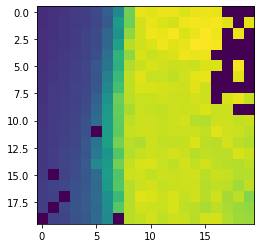

In [154]:
AVE_is_contiguous = np.nanmean(AVE_contiguous,axis=-1)<1.5
av_max_AVE_distance = np.nanmean(max_AVE_distance,axis=-1)
AVE_contiguous_and_moved = (av_max_AVE_distance>2)*AVE_is_contiguous
print(((max_AVE_distance>2).mean(axis=-1)*AVE_is_contiguous).shape)
plt.imshow(((max_AVE_distance).mean(axis=-1)*AVE_is_contiguous)[-1])
print(AVE_is_contiguous.mean())


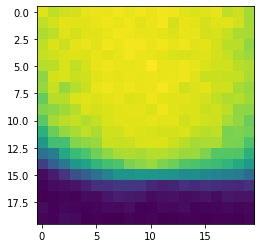

In [230]:
N = 20
W01_range = np.linspace(-3, -1, N)
AVE_p0_range = np.linspace(3.4, 5, N)
VE_p0_range = np.linspace(3.4, 5, N)
x,y = np.meshgrid(AVE_p0_range,VE_p0_range)
# plt.tricontourf(x.ravel(),y.ravel(), AVE_contiguous.mean(axis=-1)[:,-1].ravel(), levels=20, cmap='viridis')
plt.imshow(AVE_contiguous.mean(axis=-1)[:,-3],interpolation="nearest")
plt.show()


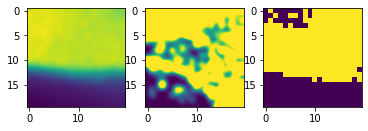

In [188]:
fig, ax = plt.subplots(1,3)
i = 19
ax[0].imshow(np.flip(np.nanmean(max_AVE_distance,axis=-1)[i].T,axis=0),interpolation="bicubic")#,vmin=0,vmax=1)
ax[1].imshow(np.flip(np.nanmean(AVE_contiguous,axis=-1)[i].T,axis=0),interpolation="bicubic",vmin=1,vmax=1.1)#,vmin=0,vmax=1)
ax[2].imshow(np.flip(AVE_contiguous_and_moved[i].T,axis=0))#,interpolation="bicubic",vmin=0,vmax=1)

# x,y = np.meshgrid(AVE_p0_range,VE_p0_range)
# plt.contourf(max_AVE_distance.mean(axis=-1)[-1],levels=[3.])


In [190]:

def make_extent(x_range,y_range,xscale="linear",yscale="linear"):
    if xscale == "log":
        x_range = np.log10(x_range)
    if yscale == "log":
        y_range = np.log10(y_range)
    extent = [x_range[0],x_range[-1],y_range[0],y_range[-1]]
    aspect = (extent[1]-extent[0])/(extent[3]-extent[2])
    return extent,aspect


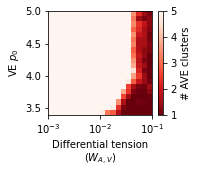

In [254]:
fig, ax = plt.subplots(figsize=(4,4))
vmin=1
vmax=5
extent,aspect = make_extent(W01_range,VE_p0_range,xscale="linear")
ax.imshow(np.flip(np.nanmean(AVE_contiguous,axis=-1)[:,10].T,axis=0),interpolation="nearest",cmap="Reds_r",extent=extent,aspect=aspect,vmin=vmin,vmax=vmax)#,vmin=0,vmax=1)
ax.set(xlabel="Differential tension\n("r"$W_{A,V}$"")",ylabel="VE "r"$p_0$")
ax.set_xticks([-3,-2,-1],labels=[r"$10^{%d}$"%i for i in [-3,-2,-1]])
sm = plt.cm.ScalarMappable(cmap="Reds_r", norm=plt.Normalize(vmax=vmax,vmin=vmin))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.3, right=0.8, wspace=0.7)
cl = plt.colorbar(sm, ax=ax, pad=0.05, fraction=0.05, aspect=18, orientation="vertical")
cl.set_label("# AVE clusters")
fig.subplots_adjust(left=0.3,right=0.7,bottom=0.3,top=0.8)
fig.savefig("../analysis_results/num AVE clusters.pdf",dpi=300)


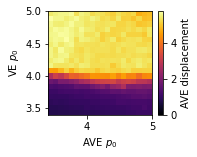

In [250]:
extent,aspect = make_extent(AVE_p0_range,VE_p0_range,xscale="linear")
fig, ax = plt.subplots(figsize=(4,4))
vmin=0
vmax=5.8
ax.imshow(np.flip(np.nanmean(max_AVE_distance,axis=-1)[-1].T,axis=0),interpolation="nearest",cmap="inferno",extent=extent,aspect=aspect,vmin=vmin,vmax=vmax)#,vmin=0,vmax=1)
ax.set(xlabel="AVE "r"$p_0$",ylabel="VE "r"$p_0$")
sm = plt.cm.ScalarMappable(cmap="inferno", norm=plt.Normalize(vmax=vmax,vmin=vmin))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.3, right=0.8, wspace=0.7)
cl = plt.colorbar(sm, ax=ax, pad=0.05, fraction=0.05, aspect=18, orientation="vertical")
cl.set_label("AVE displacement")
fig.subplots_adjust(left=0.3,right=0.7,bottom=0.3,top=0.8)
fig.savefig("../analysis_results/p0AVE vs p0VE.pdf",dpi=300)

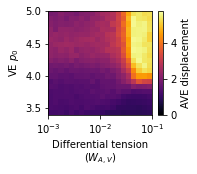

In [256]:
extent,aspect = make_extent(W01_range,VE_p0_range,xscale="linear")
fig, ax = plt.subplots(figsize=(4,4))
vmin=0
vmax=5.8
ax.imshow(np.flip(np.nanmean(max_AVE_distance,axis=-1)[:,10].T,axis=0),interpolation="nearest",cmap="inferno",extent=extent,aspect=aspect,vmin=vmin,vmax=vmax)#,vmin=0,vmax=1)
ax.set(xlabel="Differential tension\n("r"$W_{A,V}$"")",ylabel="VE "r"$p_0$")
ax.set_xticks([-3,-2,-1],labels=[r"$10^{%d}$"%i for i in [-3,-2,-1]])

sm = plt.cm.ScalarMappable(cmap="inferno", norm=plt.Normalize(vmax=vmax,vmin=vmin))
fig.subplots_adjust(bottom=0.3, top=0.8, left=0.3, right=0.8, wspace=0.7)
cl = plt.colorbar(sm, ax=ax, pad=0.05, fraction=0.05, aspect=18, orientation="vertical")
cl.set_label("AVE displacement")
fig.subplots_adjust(left=0.3,right=0.7,bottom=0.3,top=0.8)
fig.savefig("../analysis_results/W01 vs p0VE.pdf",dpi=300)

4.242105263157894


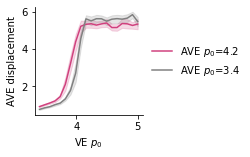

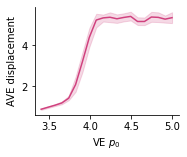

In [229]:
w,x,y,z = np.meshgrid(W01_range,AVE_p0_range,VE_p0_range,np.arange(20),indexing="ij")
df_total = pd.DataFrame({"d":max_AVE_distance.ravel(),"w":w.ravel(),"Ap0":x.ravel(),"Vp0":y.ravel(),"seed":z.ravel()})

print(AVE_p0_range[10])
fig, ax = plt.subplots(figsize=(5,3))
sns.lineplot(data=df_total[(df_total["w"]==w.max())*(df_total["Ap0"]==AVE_p0_range[10])],x="Vp0",y="d",ax=ax,color="#d0417e",label="AVE "r"$p_0$""=%.1f"%AVE_p0_range[10])
sns.lineplot(data=df_total[(df_total["w"]==w.max())*(df_total["Ap0"]==AVE_p0_range[0])],x="Vp0",y="d",ax=ax,color="grey",label="AVE "r"$p_0$""=%.1f"%AVE_p0_range[0])
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set(xlabel="VE "r"$p_0$",ylabel="AVE displacement")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.subplots_adjust(left=0.3,right=0.6,bottom=0.3,top=0.8)
fig.savefig("../analysis_results/AVE_displacement vs VEp0 diff AVEp0.pdf",dpi=300)

fig, ax = plt.subplots(figsize=(4,3))
sns.lineplot(data=df_total[(df_total["w"]==w.max())*(df_total["Ap0"]==AVE_p0_range[10])],x="Vp0",y="d",ax=ax,color="#d0417e")
# sns.lineplot(data=df_total[(df_total["w"]==w.max())*(df_total["Ap0"]==AVE_p0_range[0])],x="Vp0",y="d",ax=ax,color="grey",label="AVE "r"$p_0$""=%.1f"%AVE_p0_range[0])
# legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.set(xlabel="VE "r"$p_0$",ylabel="AVE displacement")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.subplots_adjust(left=0.3,right=0.8,bottom=0.3,top=0.8)
fig.savefig("../analysis_results/AVE_displacement vs VEp0.pdf",dpi=300)


In [143]:

def plot_surface(volume, x, y, z, smooth=False):
    # Extract the surface using Marching Cubes algorithm.
    if smooth:
        verts, faces = mcubes.marching_cubes(mcubes.smooth(volume), 0.5)
    else:
        verts, faces = mcubes.marching_cubes(volume, 0.5)

    # Scale the vertices with the grid spacing of the X, Y, and Z arrays.
    verts_scaled = np.array(verts)
    verts_scaled[:, 0] = (x.max() - x.min()) * verts[:, 0] / volume.shape[0] + x.min()
    verts_scaled[:, 1] = (y.max() - y.min()) * verts[:, 1] / volume.shape[1] + y.min()
    verts_scaled[:, 2] = (z.max() - z.min()) * verts[:, 2] / volume.shape[2] + z.min()

    # Convert the faces array to integers.
    faces = faces.astype(int)

    # Create the figure for the interactive 3D plot.
    fig = go.Figure()

    # Add the mesh surface to the plot.
    fig.add_trace(go.Mesh3d(x=verts_scaled[:, 0], y=verts_scaled[:, 1], z=verts_scaled[:, 2],
                            i=faces[:, 0], j=faces[:, 1], k=faces[:, 2]))

    # fig.add_trace(go.Surface(x=verts_scaled[:, 0], y=verts_scaled[:, 1], z=verts_scaled[:, 2]))


    # Set the axis labels and title.
    fig.update_layout(scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
                      title="Approximated Surface of Filled Volume")

    # Flip the x-axis by reversing the range of xaxis.
    fig.update_layout(scene=dict(xaxis=dict(range=[x.max(), x.min()])))

    # Show the interactive 3D plot.
    fig.show()

# # Define the volume as provided
# x = np.linspace(0, 2, 50)
# y = np.linspace(0, 2, 50)
# z = np.linspace(0, 2, 50)
# X, Y, Z = np.meshgrid(x, y, z, indexing="ij")
# volume = (np.sqrt(X**2 + Y**2 + Z**2) <= 1) + (np.sqrt((X - 2)**2 + Y**2 + Z**2) <= 1)

N = 20
W01_range = np.linspace(-3, -1, N)
AVE_p0_range = np.linspace(3.4, 5, N)
VE_p0_range = np.linspace(3.4, 5, N)
# Plot the surface of the volume interactively with custom tick values and labels.
plot_surface(AVE_contiguous_and_moved, W01_range, AVE_p0_range, VE_p0_range, False)


['81015',
 '157077',
 '103528',
 '6938',
 '137224',
 '29671',
 '118105',
 '82017',
 '53556',
 '107662',
 '125349',
 '57287',
 '40346',
 '29125',
 '154369',
 '106693',
 '119534',
 '56638',
 '122472',
 '43763',
 '101684',
 '35740',
 '12225',
 '57386',
 '154608',
 '66682',
 '116309',
 '140907',
 '56514',
 '35694',
 '66100',
 '4477',
 '70175',
 '36598',
 '64999',
 '147287',
 '64844',
 '158764',
 '151100',
 '139573',
 '121170',
 '8711',
 '158519',
 '111636',
 '125999',
 '135513',
 '49300',
 '107403',
 '92862',
 '130481',
 '108180',
 '107037',
 '89353',
 '37051',
 '149122',
 '58193',
 '10758',
 '36127',
 '121099',
 '74442',
 '115017',
 '121413',
 '152316',
 '96168',
 '147134',
 '126142',
 '68287',
 '150335',
 '69613',
 '146362',
 '36375',
 '18289',
 '192',
 '65116',
 '97983',
 '88209',
 '4819',
 '67088',
 '51330',
 '44494',
 '140772',
 '71673',
 '110132',
 '75853',
 '137643',
 '73114',
 '101195',
 '6691',
 '99851',
 '133528',
 '30229',
 '4614',
 '93675',
 '117068',
 '49051',
 '42946',
 '1213

'../analysis_results/all/22072023_W01_AVEp0_VEp0_81015_analysis.csv'

NameError: name 'range_to_sample' is not defined

,max_AVE_distance,percentile95_distance,t_95_distance,AVE_contiguous
0,2.733275,2.717159,281.0,15.0
1,5.958439,5.951376,276.0,1.0
2,2.793081,2.758434,285.0,14.0
3,2.035763,1.966353,285.0,19.0
4,0.792814,0.792041,198.0,1.0
...,...,...,...,...
395,5.687129,5.597755,285.0,2.0
396,4.827025,4.820473,271.0,1.0
397,0.881392,0.876423,152.0,2.0
398,2.608872,2.600741,237.0,17.0
